# Batch Normalization
Batch normalization is used to stabilize and perhaps accelerate the learning process. It does so by applying a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

## Backpropagation

At a high level, backpropagation modifies the weights in order to lower the value of cost function. However, before we can understand the reasoning behind batch normalization, it’s critical that we grasp the actual mathematics underlying backpropagation.

To make the problem simpler, we will assume we have a neural network consisting of two layers, each with a single neuron.
![alt text](./images/1.png)

We can express output of each neuron using the following formulas:
![alt text](./images/2.png)

Where:

- L = the layer in the neural network
- w = the weight with which the outgoing edges from the neuron are multiplied
- a = output from the neuron in the previous layer (the value of the incoming edge)
- σ = the activation function
- b = the output from the bias neuron (the value of the incoming edge)

A typical example of a cost function is mean squared error. For an individual sample, we subtract the actual value (i.e. y) from the predicted value and square the result to account for instances when the predicted value is greater or lower than the actual value.

![alt text](./images/3.png)
![alt text](./images/4.png)

As we mentioned previously, we modify the weights in order to minimize the cost function. If we plotted the cost in relation to an individual weight, the cost would be at its lowest at the bottom of the parabola.

![alt text](./images/5.png)

We can get the partial derivative of the cost function with respect to the weight by making use of the chain rule in Calculus.

![alt text](./images/6.png)

The partial derivative of each of the terms can be expressed as follows.

![alt text](./images/7.png)

Notice how we use the derivative of the activation function.

![alt text](./images/8.png)

If we use a sigmoid function for our activation function, then, if z (the output of the neuron prior to the activate function) is very large or very small, the derivative will be approximately 0. In consequence, when we go to compute the gradient and update the weights, the change will be so infinitesimally small that the model won’t improve. The latter is known as the vanishing gradient problem.

![alt text](./images/9.png)

In normalizing the output of the neuron before it enters the activation function, we can ensure it remains close to 0 where the derivative highest.


![alt text](./images/10.png)

## Normalization

Random processes in nature tend to follow a bell shape curve known as a normal distribution.

![alt text](./images/12.jpeg)

The mean is the sum of all the data points divided by the total number of points. Increasing the mean shifts the center of the bell shape curve to the right and decreasing the mean shifts the center of the bell shape curve to the left. On the other hand, the standard deviation (square root of the variance) describes how far the samples differ from the mean. Increasing the standard deviation widens the curve.

![alt text](./images/13.png)

In order to normalize the data, we subtract the mean and divide by the standard deviation.

![alt text](./images/13.gif)

No matter the data we’re working with, after normalizing it, the mean will be equal to 0 and the standard deviation will be equal to 1.

Note: This is the same as saying it ensures the variance is equal to 1 since the standard deviation is equal to the square root of the variance.

## Batch Normalization

Suppose we built a neural network with the goal of classifying grayscale images. The intensity of every pixel in a grayscale image varies from 0 to 255. Prior to entering the neural network, every image will be transformed into a 1 dimensional array. Then, every pixel enters one neuron from the input layer. If the output of each neuron is passed to a sigmoid function, then every value other than 0 (i.e. 1 to 255) will be reduced to a number close to 1. Therefore, it’s common to normalize the pixel values of each image before training. Batch normalization, on the other hand, is used to apply normalization to the output of the hidden layers.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('dark_background')

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical

Using TensorFlow backend.


The cifar10 dataset is comprised of 60,000 32×32 pixel images divided into 10 classes. The classes and their standard associated integer values are listed below.

    0: airplane
    1: automobile
    2: bird
    3: cat
    4: deer
    5: dog
    6: frog
    7: horse
    8: ship
    9: truck
    
![alt text](./images/14.png)

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
train_datagen = ImageDataGenerator(
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_datagen.fit(X_train)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32
)

In [4]:
steps = int(X_train.shape[0] / 64)
steps

781

In [5]:
def build_model(batch_normalization, activation):
    model = Sequential()
    model.add(Conv2D(32, 3, activation = activation, padding = 'same', input_shape = (32, 32, 3)))
    if batch_normalization: model.add(BatchNormalization())
    model.add(Conv2D(32, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
    if batch_normalization: model.add(BatchNormalization())
    model.add(MaxPooling2D())
    model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
    if batch_normalization: model.add(BatchNormalization())
    model.add(Conv2D(64, 3, activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
    if batch_normalization: model.add(BatchNormalization()) 
    model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(128, activation = activation, kernel_initializer = 'he_uniform'))
    model.add(Dense(10, activation = 'softmax'))

    return model

In [6]:
sig_model = build_model(batch_normalization = False, activation = 'sigmoid')

In [7]:
sig_model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [8]:
sig_history = sig_model.fit_generator(
        train_generator,
        steps_per_epoch = steps,
        epochs = 10,
        validation_data = (X_test, y_test)
)

Epoch 1/10
781/781 [==============================] - 29s 37ms/step - loss: 2.3172 - acc: 0.1039 - val_loss: 2.3083 - val_acc: 0.1000
Epoch 2/10
781/781 [==============================] - 25s 32ms/step - loss: 2.3119 - acc: 0.0984 - val_loss: 2.3065 - val_acc: 0.1000
Epoch 3/10
781/781 [==============================] - 25s 32ms/step - loss: 2.3110 - acc: 0.0994 - val_loss: 2.3068 - val_acc: 0.1000
Epoch 4/10
781/781 [==============================] - 25s 32ms/step - loss: 2.3107 - acc: 0.1009 - val_loss: 2.3137 - val_acc: 0.1000
Epoch 5/10
781/781 [==============================] - 25s 32ms/step - loss: 2.3115 - acc: 0.1001 - val_loss: 2.3074 - val_acc: 0.1000
Epoch 6/10
781/781 [==============================] - 25s 32ms/step - loss: 2.3111 - acc: 0.0962 - val_loss: 2.3198 - val_acc: 0.1000
Epoch 7/10
781/781 [==============================] - 25s 32ms/step - loss: 2.3117 - acc: 0.1000 - val_loss: 2.3071 - val_acc: 0.1000
Epoch 8/10
781/781 [==============================] - 24s 31ms

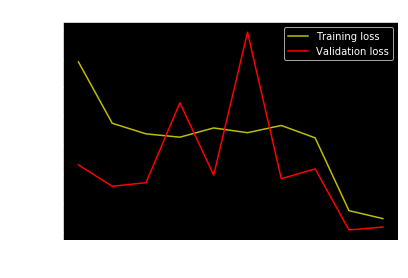

In [9]:
loss = sig_history.history['loss']
val_loss = sig_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

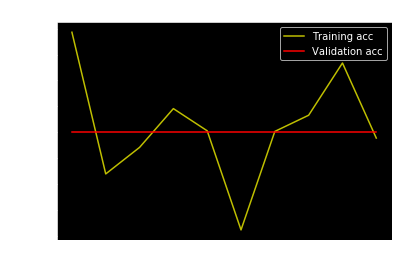

In [10]:
acc = sig_history.history['acc']
val_acc = sig_history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
sig_norm_model = build_model(batch_normalization = True, activation = 'sigmoid')

In [12]:
sig_norm_model.compile(
    optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [13]:
sig_norm_history = sig_norm_model.fit_generator(
        train_generator,
        steps_per_epoch = steps,
        epochs = 10,
        validation_data = (X_test, y_test)
)

Epoch 1/10
781/781 [==============================] - 35s 45ms/step - loss: 1.5870 - acc: 0.4321 - val_loss: 1.8002 - val_acc: 0.3926
Epoch 2/10
781/781 [==============================] - 34s 44ms/step - loss: 1.2357 - acc: 0.5592 - val_loss: 1.3667 - val_acc: 0.5285
Epoch 3/10
781/781 [==============================] - 34s 43ms/step - loss: 1.0907 - acc: 0.6207 - val_loss: 1.5183 - val_acc: 0.4883
Epoch 4/10
781/781 [==============================] - 34s 43ms/step - loss: 1.0237 - acc: 0.6378 - val_loss: 1.1954 - val_acc: 0.5859
Epoch 5/10
781/781 [==============================] - 34s 44ms/step - loss: 0.9732 - acc: 0.6582 - val_loss: 1.1860 - val_acc: 0.5920
Epoch 6/10
781/781 [==============================] - 34s 43ms/step - loss: 0.9343 - acc: 0.6721 - val_loss: 1.4298 - val_acc: 0.5159
Epoch 7/10
781/781 [==============================] - 34s 43ms/step - loss: 0.8983 - acc: 0.6875 - val_loss: 1.5668 - val_acc: 0.5446
Epoch 8/10
781/781 [==============================] - 34s 43ms

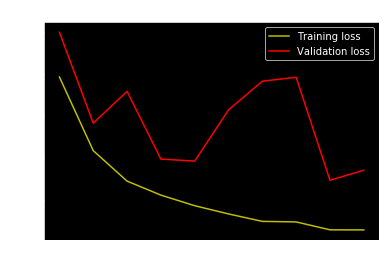

In [14]:
loss = sig_norm_history.history['loss']
val_loss = sig_norm_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

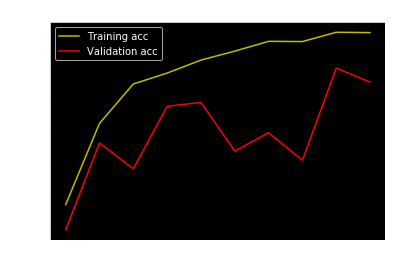

In [15]:
acc = sig_norm_history.history['acc']
val_acc = sig_norm_history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Final Thoughts

The vanishing gradient problem refers to how the gradient decreases exponentially as we propagate down to the initial layers. In consequence, the weights and biases of the initial layers won’t be updated effectively. Given that these initial layers are often crucial to recognizing the core elements of the input data, it can lead to poor accuracy.

The simplest solution is to use another activation function, such as ReLU. Otherwise, we can use batch normalization to mitigate the issue by normalizing the input such that it remains in the goldilocks zone.